In [245]:
import os
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from env.EV_Sce_Env import EV_Sce_Env
import math
import seaborn as sns
import numpy as np

env = EV_Sce_Env('HY_2', seed=0)

In [246]:
#哈佛大学Data Science课程CS109推荐的matplotlib 默认设置
#可以方便的设置一次，保证整体风格一致
from matplotlib import rcParams
# #图片大小
# rcParams['figure.figsize'] = (10, 6)
# #图片精度
# rcParams['figure.dpi'] = 150
# #线宽
# rcParams['lines.linewidth'] = 2
#是否显示网格
rcParams['axes.grid'] = True
#axes 填充颜色为浅灰
rcParams['axes.facecolor'] = '#eeeeee'
# #字体大小为14
# rcParams['font.size'] = 14
#边框为无色
rcParams['patch.edgecolor'] = 'none'

In [247]:
s = 'SY_2'
mathlod = ['GA', 'OC', 'OR', 'NGH', 'GH']
# mathlod = ['GA']
m_c = {
    'GA': 'orange',
    'OC': 'blue',
    'OR': 'green',
    'NGH': 'purple',
    'GH': 'red'
}

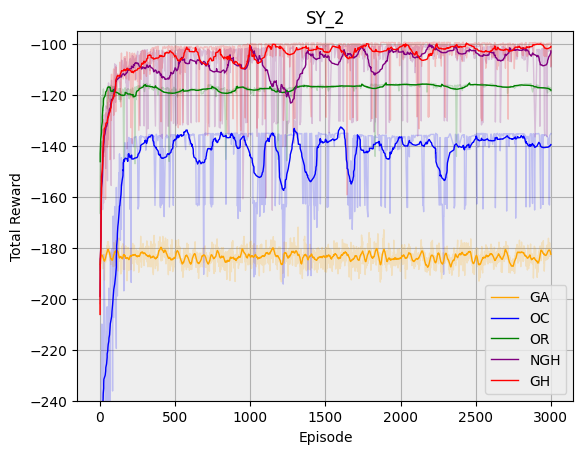

In [248]:
df_dic = {}
for m in mathlod:
    for f in os.listdir('reward'):
        if m in f.split('_') and s in f:
            df = pd.read_csv('reward/' + f)
            df_dic[m] = df
            
for m in mathlod:
    df = df_dic[m]
    plt.plot(df['Step'], df['Value'], c=m_c[m], linewidth=1, alpha=0.2)
for m in mathlod:
    df = df_dic[m]
    smooth = scipy.signal.savgol_filter(df['Value'], 51, 3)
    plt.plot(df['Step'], smooth, c=m_c[m], linewidth=1, label=m)
plt.title(s)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.ylim([-240, -95])
plt.legend()
plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list("WR", ["#eeeeee", "red"])

In [ ]:
sce = ['2P', '3P', '4P']
mal = ['DS', 'DE', 'MAPPO']

fig, axs = plt.subplots(3, 3, figsize=(15, 7), sharex='col', sharey='row')
for j, s in enumerate(sce):
    for i, m in enumerate(mal):
        dir = 'output/LS1_{}_{}'.format(m, s)
        df_cs = pd.read_csv(dir+'/CS.csv')
        waiting_time = np.array(df_cs[['CS{}_waiting_time'.format(id) for id in range(num_cs)]])
        zero_m = np.zeros_like(waiting_time)
        waiting_time = np.concatenate((waiting_time, zero_m), axis=0)[:151]
        
        ax = axs[i][j]
        sns.heatmap(
            waiting_time, 
            ax=ax, cmap=cmap, vmin=0, vmax=3,
            cbar=False
            )
        ax.xaxis.set_ticklabels(['CS{}'.format(id) for id in range(1, num_cs+1)])
        ax.set_title(m, fontsize=14)
        if i == 2:
            ax.set_xlabel(s, fontsize=16)
        # # ax.yaxis.set_ticklabels(list(df_cs['time']))
        # # ax.yaxis.set_major_locator(plt.MultipleLocator(150))
        ax.set_yticks(range(0, 151, 50))
        ax.set_yticklabels(range(0, 151, 50))
        # ax.set_ylim(200, 0)
        ax.spines['left'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.tick_params(
            axis='y',
            labelsize=14,
            )
        ax.tick_params(
            axis='x',
            labelsize=14,
            labelrotation=60
            )
        # plt.grid()
        
fig.text(0.075, 0.5, 'Time Step', va='center', rotation='vertical', fontsize=20)
fig.text(0.955, 0.5, 'Waiting time', va='center', rotation='vertical', fontsize=20)
cb_ax = fig.add_axes([0.91, 0.1, 0.01, 0.8])  # type: ignore # 位置参数需要根据情况调整
cb = fig.colorbar(ax.collections[0], cax=cb_ax)
cb.ax.tick_params(labelsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.03, hspace=0.2)
plt.savefig('hotmap.png', dpi=300, bbox_inches='tight')
plt.show()